<a href="https://colab.research.google.com/github/VedereArtificiala/prelucrareaimaginilor-proiect-nunu1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

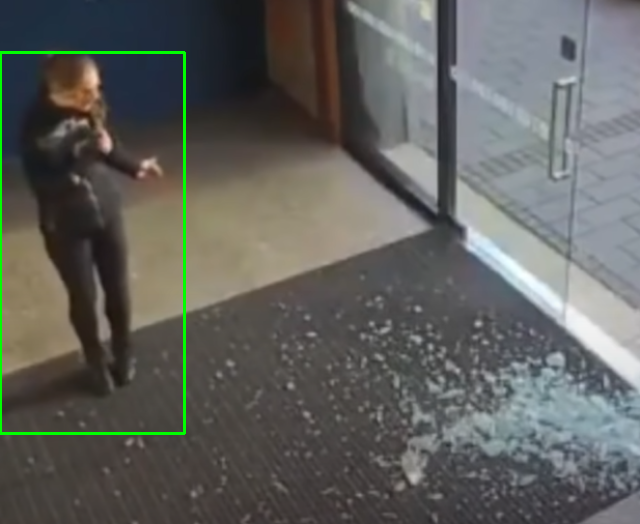

In [ ]:
import numpy as np
import cv2
import imutils
from google.colab import drive
from google.colab.patches import cv2_imshow

# Initializing the HOG person
# detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


#cap = cv2.VideoCapture('/content/drive/MyDrive/PI-P Data/y2mate.com - People Walking Free Stock Footage RoyaltyFree No Copyright Content_1080p.mp4')
cap = cv2.VideoCapture('/content/drive/MyDrive/PI-P Data/KAGGLE dataset/human/40.png')

#out = cv2.VideoWriter(
#    '/content/drive/MyDrive/PI-P Data/output.avi',
#    cv2.VideoWriter_fourcc(*'MJPG'),
#    15.,
#    (640,480))

while True:
#while cap.isOpened():
	# Reading the video stream
	ret, frame = cap.read()
	if ret:
		#frame = cv2.resize(frame, (640, 400))
		frame = imutils.resize(frame, width = 640)
		# using a greyscale picture, also for faster detection
		gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

		# detect people in the image
		# returns the bounding boxes for the detected objects
		boxes, weights = hog.detectMultiScale(frame, winStride=(8,8), padding = (4,4),scale=1.05 )

		boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

		for (xA, yA, xB, yB) in boxes:
				# display the detected boxes in the colour picture
				cv2.rectangle(frame, (xA, yA), (xB, yB),
														(0, 255, 0), 2)

		# Write the output videoq
		#out.write(frame.astype('uint8'))

		# Showing the output Image
		cv2_imshow(frame)
		if cv2.waitKey(1) & 0xFF == ord('q'):
			break
	else:
		break



cap.release()
#out.release()
cv2.destroyAllWindows()

# New Section